In [34]:
import astroquery
from astroquery.sdss import SDSS


from astropy import coordinates as coords
import astropy.units as u
import astropy.coordinates as coord

import pandas as pd
import numpy as np
from scipy import stats
import os
import matplotlib.pyplot as plt
import seaborn as sns





ModuleNotFoundError: No module named 'sklearn.grid_search'

In [2]:
from dotenv import load_dotenv, find_dotenv

_ = load_dotenv(find_dotenv())

AWS_ACCESS_KEY_ID = os.environ['AWS_ACCESS_KEY_ID']
AWS_SECRET_ACCESS_KEY = os.environ['AWS_SECRET_ACCESS_KEY']


In [3]:
import boto3
s3 = boto3.resource('s3', aws_access_key_id=AWS_ACCESS_KEY_ID, aws_secret_access_key=AWS_SECRET_ACCESS_KEY)


In [4]:
my_bucket = s3.Bucket('dpg-astro-bucket')

file_l = []
for object_summary in my_bucket.objects.filter(Prefix="sdss/"):
    if 'csv' in object_summary.key:
        filepath = 's3://dpg-astro-bucket/' + object_summary.key
        file_l.append(filepath)

file_l

['s3://dpg-astro-bucket/sdss/sdss0.csv',
 's3://dpg-astro-bucket/sdss/sdss1.csv',
 's3://dpg-astro-bucket/sdss/sdss2.csv',
 's3://dpg-astro-bucket/sdss/sdss3.csv',
 's3://dpg-astro-bucket/sdss/sdss4.csv',
 's3://dpg-astro-bucket/sdss/sdss5.csv',
 's3://dpg-astro-bucket/sdss/sdss6.csv',
 's3://dpg-astro-bucket/sdss/sdss7.csv',
 's3://dpg-astro-bucket/sdss/sdss8.csv']

In [5]:
sdss_df = pd.DataFrame()

for filepath in file_l:
    if sdss_df.empty:
        sdss_df = pd.read_csv(filepath, index_col=0)
    else:
        sdss_df = pd.concat([sdss_df, pd.read_csv(filepath, index_col=0)])

/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/fsspec/registry.py:273: UserWarning: Your installed version of s3fs is very old and known to cause
severe performance issues, see also https://github.com/dask/dask/issues/10276

To fix, you should specify a lower version bound on s3fs, or
update the current installation.

  warnings.warn(s3_msg)


In [12]:
sdss_df.head()

,specObjID,plateID,targetObjID,ra,dec,class,subclass,z,zErr,velDisp,waveMin,waveMax,spectroFlux_g,spectroFlux_r,spectroFlux_i
0,2.994897e+17,2.994894e+17,284722522357889,146.71421,-1.041304,GALAXY,STARFORMING,0.021222,0.000009,131.86360,3824.723,9210.856,140.295000,327.95220,499.94520
1,2.994900e+17,2.994894e+17,284705867235602,146.74413,-0.652191,GALAXY,NaN,0.203783,0.000039,174.16480,3824.723,9210.856,9.335421,34.65110,57.45160
2,2.994902e+17,2.994894e+17,284722522489016,146.90229,-0.984913,QSO,BROADLINE,0.652417,0.000089,0.00000,3823.843,9210.856,13.408740,15.18042,17.93766
3,2.994905e+17,2.994894e+17,284705867169913,146.62857,-0.765137,GALAXY,STARFORMING,0.064656,0.000021,123.03630,3823.843,9210.856,30.387320,71.79632,113.15380
4,2.994911e+17,2.994894e+17,284722522357956,146.63167,-0.988278,GALAXY,STARFORMING,0.052654,0.000009,41.80391,3824.723,9210.856,15.627490,24.44642,32.26784


In [6]:
feature_cols = ['ra', 'dec', 'z', 'zErr', 'velDisp', 'waveMin',
                'waveMax', 'spectroFlux_g', 'spectroFlux_r', 'spectroFlux_i']

In [7]:
X = sdss_df[feature_cols]
y = sdss_df['class'].values

In [36]:
from sklearn.model_selection import train_test_split, GridSearchCV

(X_train,
 X_test,
 y_train,
 y_test) = train_test_split(X, y,
                            stratify=y, test_size=0.20, random_state=0)

(X_train,
 X_cv,
 y_train,
 y_cv) = train_test_split(X_train, y_train,
                          stratify=y_train, test_size=0.20, random_state=0)

In [10]:
print("The shape of X_train dataset: {}".format(X_train.shape))
print("The shape of X_cv dataset: {}".format(X_cv.shape))
print("The shape of X_test dataset: {}".format(X_test.shape))

print("The shape of y_train dataset: {}".format(y_train.shape))
print("The shape of y_cv dataset: {}".format(y_cv.shape))
print("The shape of y_test dataset: {}".format(y_test.shape))

The shape of X_train dataset: (2365152, 10)
The shape of X_cv dataset: (591288, 10)
The shape of X_test dataset: (739110, 10)
The shape of y_train dataset: (2365152,)
The shape of y_cv dataset: (591288,)
The shape of y_test dataset: (739110,)


In [15]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.pipeline import Pipeline

num_pipeline = Pipeline(steps=[
    ('impute', SimpleImputer(strategy='median')),
    ('scale',MinMaxScaler())
])


In [16]:
from sklearn.compose import ColumnTransformer

num_cols = feature_cols

col_trans = ColumnTransformer(transformers=[
    ('num_pipeline',num_pipeline,num_cols)],
    remainder='drop',
    n_jobs=-1)

In [29]:
from sklearn import decomposition, linear_model

pca = decomposition.PCA()

pca_decomposer = decomposition.PCA(n_components=0.95)

In [ ]:
train_df_after_pca = make_dataframe(arr=train_df_after_pca, cols=pca_cols)
cv_df_after_pca = make_dataframe(arr=cv_df_after_pca, cols=pca_cols)
test_df_after_pca = make_dataframe(arr=test_df_after_pca, cols=pca_cols)
def scree_plotter(decomposer):
    """
    Draws the scree plot.
    
    Parameter
    ---------
    `decomposer`: pca object
    
    Returns none.
    """
    x_ = np.arange(pca_decomposer.n_components_)
    y = pca_decomposer.explained_variance_ratio_
    cum_y = np.cumsum(a=y)
    
    plt.figure(figsize=(7, 5))
    bars = sns.barplot(x=x_, y=cum_y)
    for b in bars.patches:
        x = b.get_x() + (b.get_width() / 2)
        y = np.round(b.get_height(), 3)
        bars.annotate(text=format(y),
                      xy=(x, y), ha='center', va='center', size=8, 
                      xytext=(0, 6), textcoords='offset points')
    plt.title('Scree Plot', fontsize=10)
    plt.xlabel('Principal Components', fontsize=9)
    plt.ylabel('Cumulative Variance Explained', fontsize=9)
    plt.xticks(ticks=x_)
    plt.show()

Text(0, 0.5, 'explained_variance_')

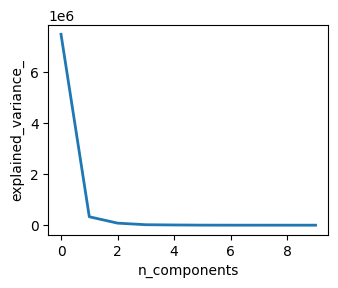

In [27]:
# Plot the PCA spectrum
pca.fit(X_train)

plt.figure(1, figsize=(4, 3))
plt.clf()
plt.axes([.2, .2, .7, .7])
plt.plot(pca.explained_variance_, linewidth=2)
plt.axis('tight')
plt.xlabel('n_components')
plt.ylabel('explained_variance_')

In [30]:
logistic = linear_model.LogisticRegression()


In [33]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(random_state=0)
pipe = Pipeline(steps=[
    ('col_trans', col_trans),
    ('pca', pca),
    ('logistic', logistic)
])

In [39]:
n_components = [1, 2, 3, 4, 5, 8, 10]
Cs = np.logspace(-4, 4, 3)

#Parameters of pipelines can be set using ‘__’ separated parameter names:

estimator = GridSearchCV(pipe,
                         dict(pca__n_components=n_components,
                              logistic__C=Cs))

In [40]:
estimator.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('col_trans',
                                        ColumnTransformer(n_jobs=-1,
                                                          transformers=[('num_pipeline',
                                                                         Pipeline(steps=[('impute',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('scale',
                                                                                          MinMaxScaler())]),
                                                                         ['ra',
                                                                          'dec',
                                                                          'z',
                                                                          'zErr',
                                                                          'velDisp',
                                                                          'waveMin',
                                                                          'waveMax',
                                                                          'spectroFlux_g',
                                                                          'spectroFlux_r',
                                                                          'spectroFlux_i'])])),
                                       ('pca', PCA()),
                                       ('logistic', LogisticRegression())]),
             param_grid={'logistic__C': array([1.e-04, 1.e+00, 1.e+04]),
                         'pca__n_components': [1, 2, 3, 4, 5, 8, 10]})

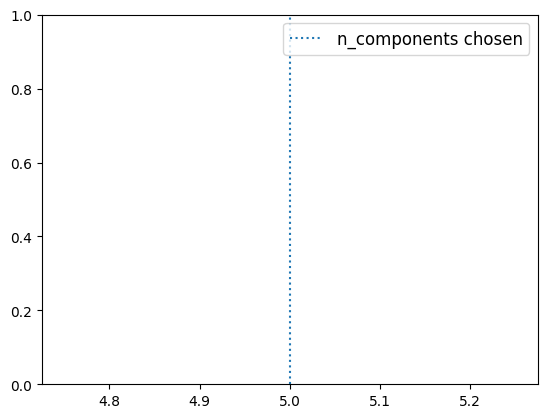

In [41]:
plt.axvline(estimator.best_estimator_.named_steps['pca'].n_components,
            linestyle=':', label='n_components chosen')
plt.legend(prop=dict(size=12))
plt.show()

In [42]:
estimator

GridSearchCV(estimator=Pipeline(steps=[('col_trans',
                                        ColumnTransformer(n_jobs=-1,
                                                          transformers=[('num_pipeline',
                                                                         Pipeline(steps=[('impute',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('scale',
                                                                                          MinMaxScaler())]),
                                                                         ['ra',
                                                                          'dec',
                                                                          'z',
                                                                          'zErr',
                                                                          'velDisp',
                                                                          'waveMin',
                                                                          'waveMax',
                                                                          'spectroFlux_g',
                                                                          'spectroFlux_r',
                                                                          'spectroFlux_i'])])),
                                       ('pca', PCA()),
                                       ('logistic', LogisticRegression())]),
             param_grid={'logistic__C': array([1.e-04, 1.e+00, 1.e+04]),
                         'pca__n_components': [1, 2, 3, 4, 5, 8, 10]})

In [43]:
import numpy as np
import pandas as pandas

import pandas
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [44]:
# prepare configuration for cross validation test harness
seed = 7
# prepare models
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))


In [46]:
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
 kfold = model_selection.KFold(n_splits=10)
 cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
 results.append(cv_results)
 names.append(name)
 msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
 print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/dangause/anaconda3/envs/sdss/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/lin

LR: 0.897185 (0.001020)
LDA: 0.936329 (0.000511)
KNN: 0.941078 (0.000455)
CART: 0.997092 (0.000070)
NB: 0.836101 (0.001050)
